In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
X, y = (
    make_classification(
        n_samples = 1000,
        n_features = 10,
        n_redundant = 7,
        n_classes = 2,
        random_state =10
    )
)

X = pd.DataFrame(X)
y = pd.DataFrame(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

<AxesSubplot:>

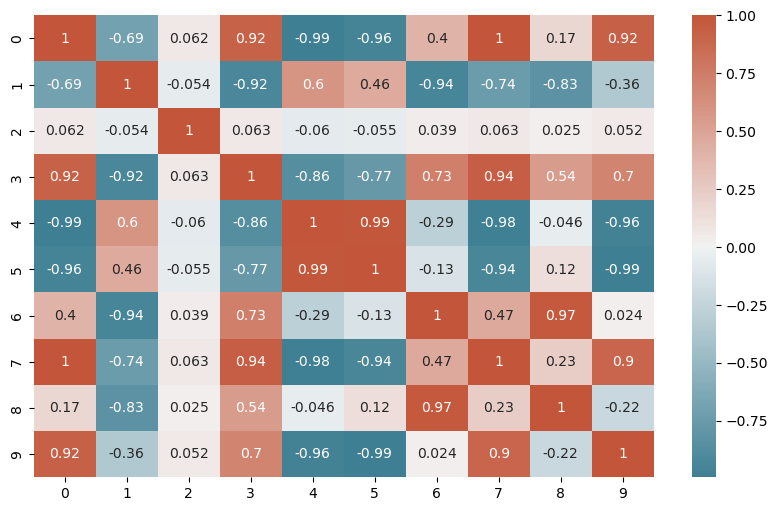

In [3]:
corrmat = X_train.corr(method = "pearson")

fig, ax = plt.subplots(figsize = (10, 6))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corrmat, cmap = cmap, annot = True)

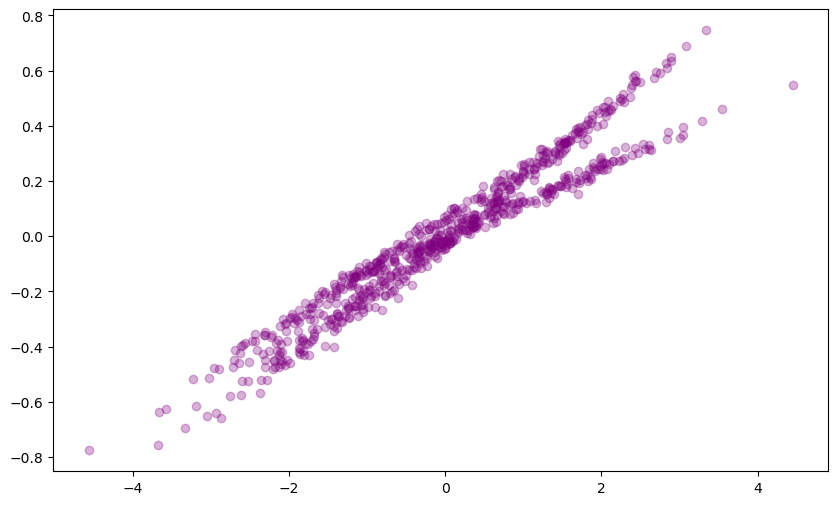

In [4]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(
    X_train[8],
    X_train[6],
    alpha = 0.3,
    color = "purple"
)

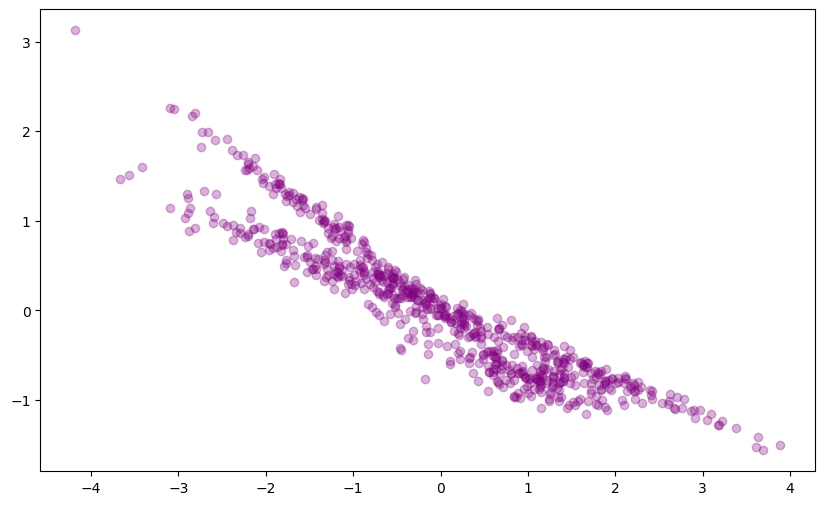

In [5]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(
    X_train[7],
    X_train[5],
    alpha = 0.3,
    color = "purple"
)

### 3.1 Remove correlated features: retain first, remove the rest


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropCorrelatedFeatures

In [7]:
X, y = (
    make_classification(
        n_samples = 1000,
        n_features = 10,
        n_redundant = 7,
        n_classes = 2,
        random_state =10
    )
)

X = pd.DataFrame(X)
y = pd.DataFrame(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

In [8]:
sel = DropCorrelatedFeatures(method="pearson", threshold=0.8)
sel.fit(X_train)

# Featureswill be dropped
sel.features_to_drop_

{3, 4, 5, 6, 7, 8, 9}

In [9]:
# Correlated features
sel.correlated_feature_sets_

[{0, 3, 4, 5, 7, 9}, {1, 6, 8}]

In [10]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

print(X_train_t.shape, X_test_t.shape)

(700, 3) (300, 3)


### Remove correlated features: retain best features, remove the rest

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from feature_engine.selection import SmartCorrelatedSelection

In [12]:
X, y = (
    make_classification(
        n_samples = 1000,
        n_features = 10,
        n_redundant = 7,
        n_classes = 2,
        random_state =10
    )
)

X = pd.DataFrame(X)
y = pd.DataFrame(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

In [14]:
sel = SmartCorrelatedSelection(
    method = "pearson",
    threshold=0.8,
    selection_method = "model_performance",
    estimator = RandomForestClassifier(n_estimators=5, random_state=10),
    scoring = "roc_auc",
    cv = 3
)

In [15]:
sel.fit(X_train, y_train)

d:\Miniconda\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Miniconda\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Miniconda\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Miniconda\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: 

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=5,
                                                          random_state=10),
                         selection_method='model_performance')

In [16]:
sel.features_to_drop_

[0, 3, 4, 5, 6, 8, 9]

In [17]:
sel.correlated_feature_sets_

[{0, 3, 4, 5, 7, 9}, {1, 6, 8}]

In [18]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.head()

,1,2,7
105,-3.715633,0.250835,2.115155
68,3.029661,-1.979157,-1.822263
479,1.192578,1.439996,-0.613533
399,-0.505949,-0.049844,1.577046
434,1.894522,-1.161771,-1.321103
